In [1]:
#questions to be answerd

#Is there a relationship between how much the world is affected by climate change and the amount of mentions in their speeches?

#To do 
#Temperature data set mixing with this
#Pre-process/Transform temperature dataset into DataFrame
#Map with color for temperature changes
#Regression for temperature and climate change mentions


## Import the databases

In [5]:
import os
import numpy as np
import pandas as pd

sessions = np.arange(25, 76)
data=[]


for session in sessions:
    directory = "./TXT/Session "+str(session)+" - "+str(1945+session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename),encoding="utf8")
        if filename[0]==".": #ignore hidden files
            continue
        splt = filename.split("_")
        data.append([session, 1945+session, splt[0], f.read()])

        
df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])
df_speech.tail()

        
df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

temp = pd.read_csv('greenpeace.csv')

#set index to years and change column names for easy use
temp = temp.set_index('Year')
temp = temp.rename(columns={'Entity': 'Country', 'Surface temperature anomaly': 'Anomaly'})

#only get years 1970 and above, main data set is 1970 and above
temp = temp[temp.index >1969]

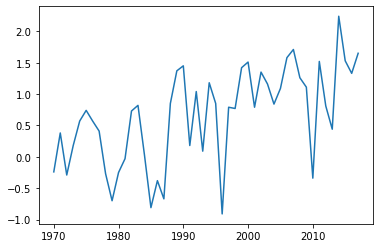

In [7]:
#check the temperature of a chosen country
test = temp[temp['Country'] == 'Netherlands']['Anomaly']
plt.plot(test)

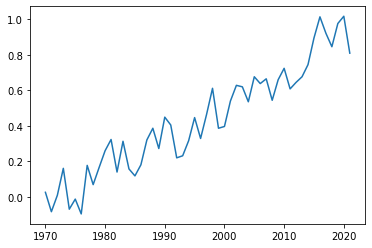

In [8]:
# can't take the average of tempereture anomaly, difference in area etc, so a different dataset for total global warming
world = pd.read_csv('globaltemp.csv')

#create extra column that gives only the year of the anomaly per month
world['Year'] = pd.DatetimeIndex(world['Day']).year

#change column names & remove 'Code'
world = world.rename(columns = {'Entity': 'Country', 'temperature_anomaly': 'Anomaly'})[['Country', 'Anomaly', 'Year']]

# date is per month, change it to anomaly per year, set index to year
world = world[world['Country'] == 'World']
world = world.groupby('Year').mean()

#only get the data from 1970 and up, because of our main data set being 1970 and higher
world = world[world.index > 1969]

plt.plot(world)




## Fit the model

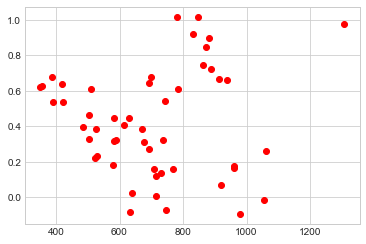

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

df_copy = pd.read_pickle("climate_mentions.pkl")
df_copy['Climate Mentions Count - Absolute'] = df_copy['Climate Mentions Count'] * df_copy['Speech'].str.len()



x = df_copy.groupby("Year").mean()["Climate Mentions Count - Absolute"]
y = world[world.Anomaly.index <= 2020]


plt.plot(x, y, 'o', color='red');

groupedcount = df_copy.groupby("Year").mean()
counttemp = groupedcount.join(world)[["Climate Mentions Count - Absolute", "Anomaly"]]

y = 0.21465 * x + -0.00067 * x^2 + 0.00000 * x^3 + -0.00000 * x^4 + 0.00000 * x^5 + -25.39546


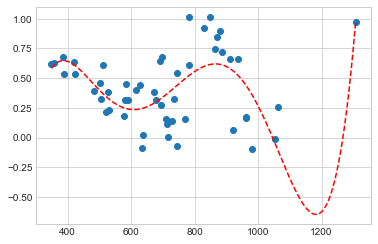

In [20]:
# fit a fifth degree polynomial to the economic data
from numpy import arange
import numpy
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f
 
# load the dataset
data = counttemp
data = data.values

# choose the input and output variables
x, y = data[:, 0], data[:, 1]

# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b, c, d, e, f = popt

print('y = %.5f * x + %.5f * x^2 + %.5f * x^3 + %.5f * x^4 + %.5f * x^5 + %.5f' % (a, b, c, d, e, f))

# plot input vs output
pyplot.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)

# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, f)

# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

y = -0.00183 * x + 0.00000 * x^2 + 1.03243


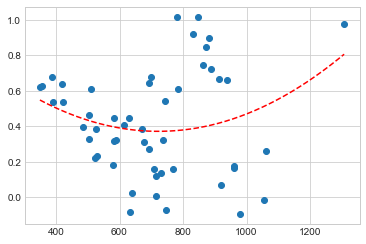

In [52]:
# fit a second degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b, c):
    return a * x + b * x**2 + c
 
# load the dataset
data = counttemp
data = data.values

# choose the input and output variables
x, y = data[:, 0], data[:, 1]
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

y = -0.00013 * x + 0.50217


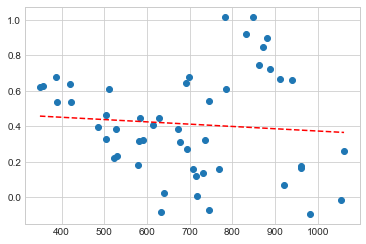

In [67]:
# fit a straight line to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b):
    return a * x + b
 
# load the dataset
data = counttemp
data = data.values

# choose the input and output variables
x, y = data[:, 0], data[:, 1]

# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

# plot input vs output
pyplot.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)

# calculate the output for the range
y_line = objective(x_line, a, b)

# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

## Remove outliers

C:\Users\Martin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Climate Mentions Count - Absolute'>

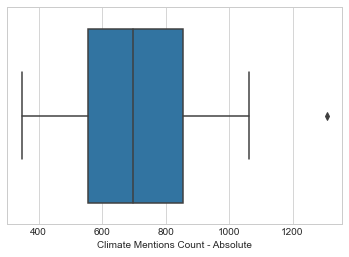

In [58]:
import seaborn as sns

#find outliers
sns.boxplot(counttemp['Climate Mentions Count - Absolute'])

In [64]:
counttemp['Climate Mentions Count - Absolute'].idxmax()

2019

C:\Users\Martin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Climate Mentions Count - Absolute'>

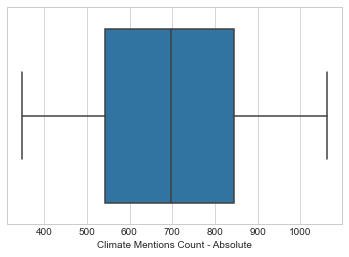

In [66]:
#manually remove outlier
counttemp = counttemp[counttemp.index != 2019]
sns.boxplot(counttemp['Climate Mentions Count - Absolute'])



## Check the models again with removed outliers

y = -0.00076 * x + 0.00000 * x^2 + 0.70558


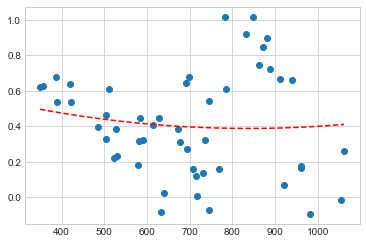

In [70]:
# fit a second degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b, c):
    return a * x + b * x**2 + c
 
# load the dataset
data = counttemp
data = data.values

# choose the input and output variables
x, y = data[:, 0], data[:, 1]
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

y = 0.45826 * x + -0.00144 * x^2 + 0.00000 * x^3 + -0.00000 * x^4 + 0.00000 * x^5 + -55.06199


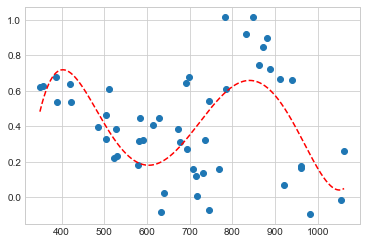

In [71]:
# fit a fifth degree polynomial to the economic data
from numpy import arange
import numpy
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f
 
# load the dataset
data = counttemp
data = data.values

# choose the input and output variables
x, y = data[:, 0], data[:, 1]

# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b, c, d, e, f = popt

print('y = %.5f * x + %.5f * x^2 + %.5f * x^3 + %.5f * x^4 + %.5f * x^5 + %.5f' % (a, b, c, d, e, f))

# plot input vs output
pyplot.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)

# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, f)

# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()